## Load Dataset

In [1]:
import pandas as pd
import re

In [2]:
# Load dataset

df = pd.read_csv("train_preprocess.tsv.txt" ,encoding="latin1",sep='\t',header=None,names=["text","label"])

In [3]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [4]:
df.shape

(11000, 2)

In [5]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
#Cek duplikasi data

df.duplicated().sum()

67

In [7]:
# Hapus duplicated data

df = df.drop_duplicates()

In [8]:
print('Jumlah Duplikasi Data = {}'.format(df.duplicated().sum()))
print('Duplikasi Data Tela dihapus...')

Jumlah Duplikasi Data = 0
Duplikasi Data Tela dihapus...


In [9]:
#cek lagi
df.shape

(10933, 2)

In [10]:
df.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


- Ada 67 data yang diduplikasi dalam dataset dan sudah dihapus, Update terdiri dari 10933 baris.

## Text Processing

In [119]:
df_alay = pd.read_csv('new_kamusalay.csv', encoding='ISO-8859-1', header=None)
df_alay = df_alay.rename(columns={0: 'alay', 1: 'formal'})

In [120]:
df_alay.head()

,alay,formal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali


In [121]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
list_stopwords = set(stopwords.words('indonesian'))

def data_cleaning (text):
    text = re.sub ('\\n','', text)
    text = re.sub ('RT',' ', text)
    text = re.sub ('USER', ' ', text)
    text = re.sub ('(http|https):\/\/s+', ' ', text)
    text = re.sub ('[^0-9a-zA-Z]+', ' ', text)
    text = re.sub ('x[a-z0-9]{2}', ' ', text)
    text = re.sub ("\d+", ' ', text)
    text = re.sub ('  +', '', text)
    return text

def case_folding (text):
    return text.lower()

def alay_normalization(text):
    res = ''
    for item in text.split():
        if item in df_alay['alay'].values:
            res += df_alay[df_alay['alay'] == item]['formal'].iloc[0]
        else:
            res += item
        res += ' '
    return res

def stopword_removal(text):
    resp = ''
    for item in text.split():
        if item not in list_stopwords:
            resp += item
        resp +=' '
    clean = re.sub('  +', ' ', resp)
    return clean

def cleansing(text):
    text = data_cleaning(text)
    text = case_folding(text)
    text = alay_normalization(text)
    text = stopword_removal(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
# Apply cleansing
df['text'] = df['text'].apply(cleansing)

In [62]:
df.head()

,text,label
0,warung dimiliki pengusaha pabrik puluhan terke...,positive
1,mohon ulama lurus kmmbri hujjah partai diwlh s...,neutral
2,lokasi strategis jalan sumatra bandung nya nya...,positive
3,betapa bahagia nya unbo paket barang nya bagus...,positive
4,aduh mahasiswa sombong kasih kartu kuning bela...,negative


In [77]:
import sqlite3

# Membuat koneksi ke database SQLite
conn = sqlite3.connect('database.db')

In [78]:
# Menyimpan DataFrame ke dalam tabel 'tabel_cleansed' dalam database
df.to_sql('tabel_cleansed', con=conn, index=False, if_exists='replace')

10933

In [79]:
print("DataFrame yang telah di-cleansing berhasil disimpan ke dalam tabel 'tabel_cleansed' di database.")

DataFrame yang telah di-cleansing berhasil disimpan ke dalam tabel 'tabel_cleansed' di database.


In [80]:
# Close the database

conn.commit()
conn.close()

In [81]:
# Load dataset from database

db = sqlite3.connect('database.db', check_same_thread = False)
q_data = 'SELECT * FROM tabel_cleansed'
data = pd.read_sql_query(q_data, db)
data.head()

,text,label
0,warung dimiliki pengusaha pabrik puluhan terke...,positive
1,mohon ulama lurus kmmbri hujjah partai diwlh s...,neutral
2,lokasi strategis jalan sumatra bandung nya nya...,positive
3,betapa bahagia nya unbo paket barang nya bagus...,positive
4,aduh mahasiswa sombong kasih kartu kuning bela...,negative


In [82]:
#cek label

data['label'].value_counts()

label
positive    6383
negative    3412
neutral     1138
Name: count, dtype: int64

## Feature-Label Classification

In [83]:
#sortir datanya berdasarkan tiga sentimen tadi

# Group data text

positif_text = data.loc[data['label']=='positive'].text.tolist()
negatif_text = data.loc[data['label']=='negative'].text.tolist()
neutral_text = data.loc[data['label']=='neutral'].text.tolist()

# Group data label

positif_label = data.loc[data['label']=='positive'].label.tolist()
negatif_label = data.loc[data['label']=='negative'].label.tolist()
neutral_label = data.loc[data['label']=='neutral'].label.tolist()

In [84]:
# Final data check

total_data = positif_text + negatif_text + neutral_text
labels = positif_label + negatif_label + neutral_label

print("Positive: %s, Negative: %s, Neutral: %s" % (len(positif_text), len(negatif_text), len(neutral_text)))
print("Total data: %s" % len(total_data))
print("Total labels: %s" % len(labels))

Positive: 6383, Negative: 3412, Neutral: 1138
Total data: 10933
Total labels: 10933


## Feature Extraction

In [85]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

In [86]:
max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")


tokenizer.pickle has created!


In [87]:
#memanggil modul tokenizer
X = tokenizer.texts_to_sequences(total_data)
vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

In [88]:
#memanggil modul pad sequence
X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

X

x_pad_sequences.pickle has created!


array([[    0,     0,     0, ...,   307,   265,  1736],
       [    0,     0,     0, ...,     1,     2,     2],
       [    0,     0,     0, ...,    18,  4400,   101],
       ...,
       [    0,     0,     0, ...,  1616,    65,  4999],
       [    0,     0,     0, ...,  4154,  1011,  1846],
       [    0,     0,     0, ..., 17040,  3535,   404]])

In [89]:
# Feature extraction untuk labels

Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")

y_labels.pickle has created!


# Split traning and testing dataset

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

In [92]:
file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

In [93]:
# Membagi train-test dengan pembagian 80:20

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model Training

In [94]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [95]:
embed_dim = 100
units = 64

max_features = 100000

In [96]:
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.5))
model.add(Dense(3,activation='softmax'))
   
adam = optimizers.Adam(learning_rate = 0.0005)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

print(model.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001FF20780250>>


In [97]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Epoch 1/50
274/274 [==============================] - 69s 230ms/step - loss: 0.6591 - accuracy: 0.7323 - val_loss: 0.5347 - val_accuracy: 0.7759
Epoch 2/50
274/274 [==============================] - 58s 211ms/step - loss: 0.4090 - accuracy: 0.8291 - val_loss: 0.4353 - val_accuracy: 0.8377
Epoch 3/50
274/274 [==============================] - 59s 214ms/step - loss: 0.2533 - accuracy: 0.9089 - val_loss: 0.4003 - val_accuracy: 0.8528
Epoch 4/50
274/274 [==============================] - 57s 210ms/step - loss: 0.1789 - accuracy: 0.9333 - val_loss: 0.4297 - val_accuracy: 0.8560
Epoch 5/50
274/274 [==============================] - 61s 222ms/step - loss: 0.1293 - accuracy: 0.9536 - val_loss: 0.4653 - val_accuracy: 0.8555
Epoch 5: early stopping


In [98]:
# Save the model

model.save('model_lstm.keras')
print("Model has created!")

Model has created!


# Model Evaluation

In [99]:
from sklearn import metrics

In [100]:
predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 2s 12ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       687
           1       0.74      0.75      0.75       229
           2       0.90      0.91      0.90      1271

    accuracy                           0.86      2187
   macro avg       0.82      0.82      0.82      2187
weighted avg       0.85      0.86      0.86      2187



## K Cross Validation

In [101]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

In [102]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []
y = Y
embed_dim = 100
units = 64

In [103]:
for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.5))
    model.add(Dense(3,activation='softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.0005)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    history = model.fit(data_train, target_train, epochs=50, batch_size=32, validation_data=(data_test, target_test), verbose=1, callbacks=[es])

    predictions = model.predict(X_test)
    y_pred = predictions

    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", round(average_accuracy,4))

Epoch 1/50
274/274 [==============================] - 64s 220ms/step - loss: 0.6575 - accuracy: 0.7280 - val_loss: 0.5408 - val_accuracy: 0.7723
Epoch 2/50
274/274 [==============================] - 56s 203ms/step - loss: 0.4190 - accuracy: 0.8254 - val_loss: 0.4287 - val_accuracy: 0.8240
Epoch 3/50
274/274 [==============================] - 57s 210ms/step - loss: 0.2619 - accuracy: 0.9040 - val_loss: 0.4004 - val_accuracy: 0.8441
Epoch 4/50
274/274 [==============================] - 63s 230ms/step - loss: 0.1824 - accuracy: 0.9340 - val_loss: 0.4281 - val_accuracy: 0.8381
Epoch 5/50
274/274 [==============================] - 58s 211ms/step - loss: 0.1327 - accuracy: 0.9516 - val_loss: 0.4678 - val_accuracy: 0.8528
Epoch 5: early stopping
69/69 [==============================] - 2s 12ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       687
           1       0.72      0.79      0.76       229
           2       

## Evaluation Visualization

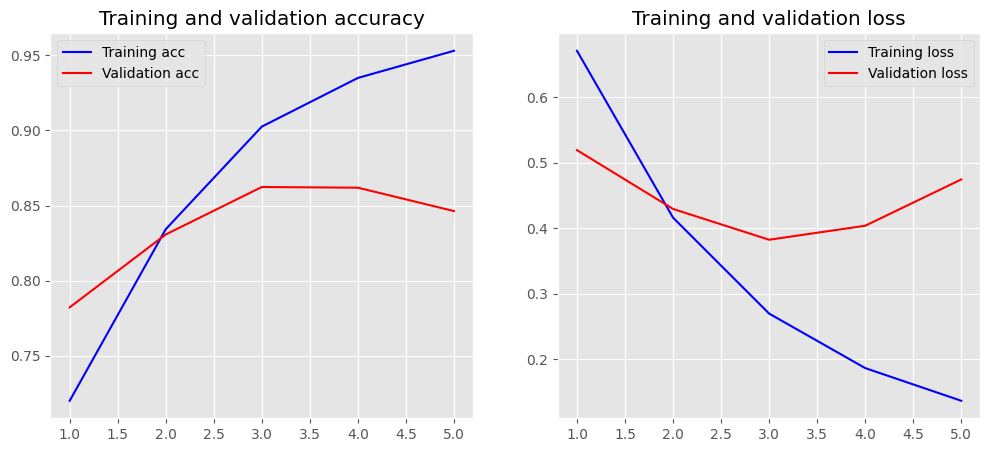

In [104]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [105]:
# Save the model

model.save('model_lstm.keras')
print("Model has created!")

Model has created!


## Prediction

In [106]:
from keras.models import load_model

input_text = """dasar cina lu  """

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model_lstm.keras')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])
hasil = sentiment[polarity]

print("Text: %s" % text[0])
print("Sentiment: %s" % sentiment[polarity])

1/1 [==============================] - 2s 2s/step
Text: dasar cina 
Sentiment: negative


In [107]:
input_text = """sekolahnya bagus"""

def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model_lstm.keras')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])
hasil = sentiment[polarity]

print("Text: %s" % text[0])
print("Sentiment: %s" % sentiment[polarity])

1/1 [==============================] - 2s 2s/step
Text: sekolahnya bagus
Sentiment: negative


# **Prediksi Data Tweet**

In [109]:
data_twt = 'Data Tweet/data.csv'
df_tweet = pd.read_csv(data_twt, encoding='latin-1')

In [110]:
df_predict = df_tweet[['Tweet']].copy()
df_predict.head()

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...


# **Predict**

In [123]:
import re 
from keras.models import load_model
import numpy as np
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [124]:
sentiment = ['negative', 'neutral', 'positive']

def get_sent(sent):
    if sent==0:
        sent='negative'
    elif sent==1:
        sent='neutral'
    else: sent='positive'
    return sent

file_tokenizer = open('tokenizer.pickle', 'rb')
file_sequencer = open('x_pad_sequences.pickle', 'rb')
load_tokenizer = pickle.load(file_tokenizer)
load_sequencer = pickle.load(file_sequencer)
file_sequencer.close()
model_lstm = load_model('model_lstm.keras')

### Predict DataFrame

In [122]:
data_pre = df_predict['Tweet']

data_processed= []
for text in data_pre:
  text = cleansing(text)
  data_processed.append(text)
    
feature = load_tokenizer.texts_to_sequences(data_processed)
sequences= pad_sequences(feature, maxlen=load_sequencer.shape[1])

prediction = model.predict(sequences)
get_sentiment = np.argmax(prediction, axis=1)
get_sentiment = get_sentiment.reshape(-1,1)

get= []
for text in get_sentiment:
    sent= get_sent(text)
    get.append(sent)

412/412 [==============================] - 7s 16ms/step


In [125]:
df_predict['Text_Clean']= data_processed
df_predict['Sentiment']= get

In [126]:
df_predict

,Tweet,Text_Clean,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,cowok berusaha melacak perhatian gue lantas r...,negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,telat tau edan sarap gue bergaul cigax jifla ...,negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang berpikir percaya tuhan jatuh berkali ka...,positive
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,ku tau matamu sipit,neutral
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kafir dongoknya dungu haha,negative
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,berbicara ndasmu congor sekateanjyng,negative
13165,USER Kasur mana enak kunyuk',kasur enak kunyuk,negative
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu bosan duh,negative
13167,USER USER USER USER Bom yang real mudah terdet...,bom real mudah terdeteksi bom terkubur dahsyat...,neutral


C:\Users\admin\AppData\Local\Temp\ipykernel_1000\4013206606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sentiment', data=df_predict, palette=color_palette)
C:\Users\admin\AppData\Local\Temp\ipykernel_1000\4013206606.py:5: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.countplot(x='Sentiment', data=df_predict, palette=color_palette)


<function matplotlib.pyplot.show(close=None, block=None)>

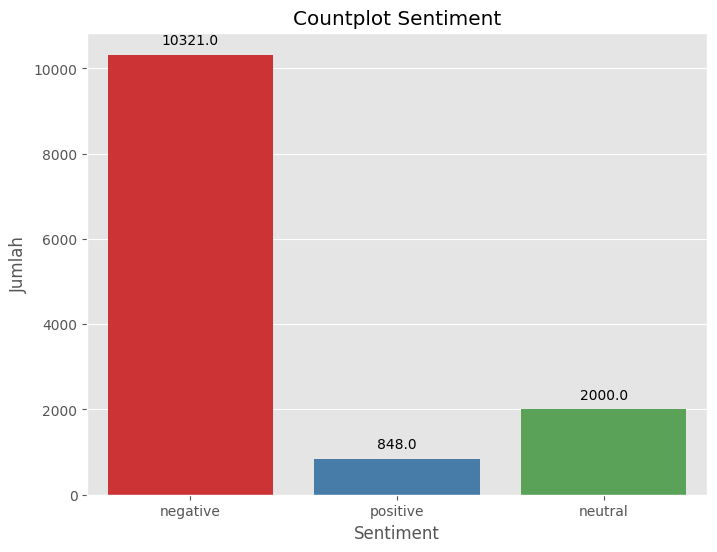

In [127]:
import seaborn as sns

color_palette = sns.color_palette("Set1")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sentiment', data=df_predict, palette=color_palette)

# Menambahkan label angka pada setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan label sumbu dan judul
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.title('Countplot Sentiment')

# Menampilkan plot
plt.show